# Students Performance in Exams
## Overview of the data.
This data contains 1000 obervations of the students who perfomed in the examination, each exam has 3 subjects `maths`, `reading` and `writing`. We also have other freatures and background of each student such as :
<br>
`gender` : Tells the gender of the student.
<br>
`ethnicity` : Tells which race/ethnicity student belongs to.
<br>
`prental level of education`: Education level of student's parents.
<br>
`lunch`: How much does he pay for lunch
<br>
`test prepration course`: Tells if student course is completed or not.
<br>
`math score`: Math score.
<br>
`reading score`: Reading score.
<br>
`writing score`: Writing score.
<br>
other variables added during preprocessing of data.
<br>
`total`: Total of all three subject scores.
<br>
`division`: In which division student comes in.
<br>
Student who have total marks above 180 : First Division
<br>
Student who have total marks between 150 to 179 : Second Division
<br>
Student who have total marks between 90 to 149 : Third Divison
<br>
Student who have total marks below 90 : Fail

## [EDA](#EDA)
### Question that are answered in this EDA
* [Average marks of a student in all 3 subjects.](#avg)
* [Which student got the highest marks in total?](#high)
* [which student got the lowest marks in total?](#low)
* [What is the average score of students in each subjects?](#sub)
* [Ratio of Male and Female students.](#ratio)
* [Ratio of ethnicity of students.](#eth)
* [On an average which group performed the best in total marks?](#grp)
* [Which gender perfomed better overall?](#over)
* [Which gender performed better in each group?](#grp2)
* [How many students have failed and which group have the most?](#fail)
* [Students got more marks than others whose parents have higer education degree?](#par)
* [Those students whose completed their course got more grades in compare to those student who didn't?](#course)
* [Is there any correlation between the subjects?](#corr)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

## Data Preprocessing

In [44]:
stu = pd.read_csv('StudentsPerformance.csv')
display(stu.head())
stu.shape

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


(1000, 8)

In [45]:
stu.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [46]:
stu.rename(columns={'race/ethnicity' : 'ethnicity'}, inplace= True)
stu.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- lets check if there is null values.

In [47]:
stu.isna().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- checking column types

In [48]:
stu.dtypes

gender                         object
ethnicity                      object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- replacing none value in `test prepration course` column to 'not completed'

In [49]:
stu['test preparation course'].unique()
stu.replace('none', 'not completed', inplace= True)
stu.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75


- checking how many unique values in each categorical variables.

In [50]:
stu.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [51]:
stu['ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [52]:
stu['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [53]:
stu.gender.unique()

array(['female', 'male'], dtype=object)

In [54]:
stu['test preparation course'].unique()

array(['not completed', 'completed'], dtype=object)

- checking if there is any dupicate rows.

In [55]:
print(stu.duplicated().sum())

print('There isn\'t any duplicate row')

0
There isn't any duplicate row


- lets create a new column 'total' which contains the sum of all three subjects out of 300 marks.

In [56]:
stu['total'] = stu.apply(lambda x: x['math score'] + x['reading score'] + x['writing score'], axis = 1)
stu.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229


- adding column 'division' which gives student 'first', 'second', 'third'or 'fail' according to their total marks.
<br>
total marks above 180 : First Division
<br>
total marks between 150 to 179 : Second Division
<br>
total marks between 90 to 149 : Third Divison
<br>
total marks below 90 : Fail

In [57]:
def col(x):
    if x >= 180:
        return 'First Division'
    elif x >= 150 and x < 180:
        return 'Second Division'
    elif x >= 90 and x < 150:
        return 'Third Division'
    else:
        return 'Fail'


stu['division'] = stu.total.apply(col)
display(stu.head())

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,First Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,not completed,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Third Division
4,male,group C,some college,standard,not completed,76,78,75,229,First Division


lets see how many values in division

In [58]:
stu.division.value_counts()

First Division     715
Second Division    182
Third Division      94
Fail                 9
Name: division, dtype: int64

lets convert division to ordinal

In [59]:
stu['division'] = pd.Categorical(stu['division'], ['Fail', 'Third Division', 'Second Division', 'First Division'], ordered= True)

stu.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,First Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,not completed,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Third Division
4,male,group C,some college,standard,not completed,76,78,75,229,First Division


## EDA<a class="anchor" id="EDA"></a>

Average Student total marks in all 3 subjects.<a class="anchor" id="avg"></a>

In [85]:
print(stu.total.describe())

print('As we can see the mean is 203 and median is 205 which is quite close.')

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total, dtype: float64
As we can see the mean is 203 and median is 205 which is quite close.


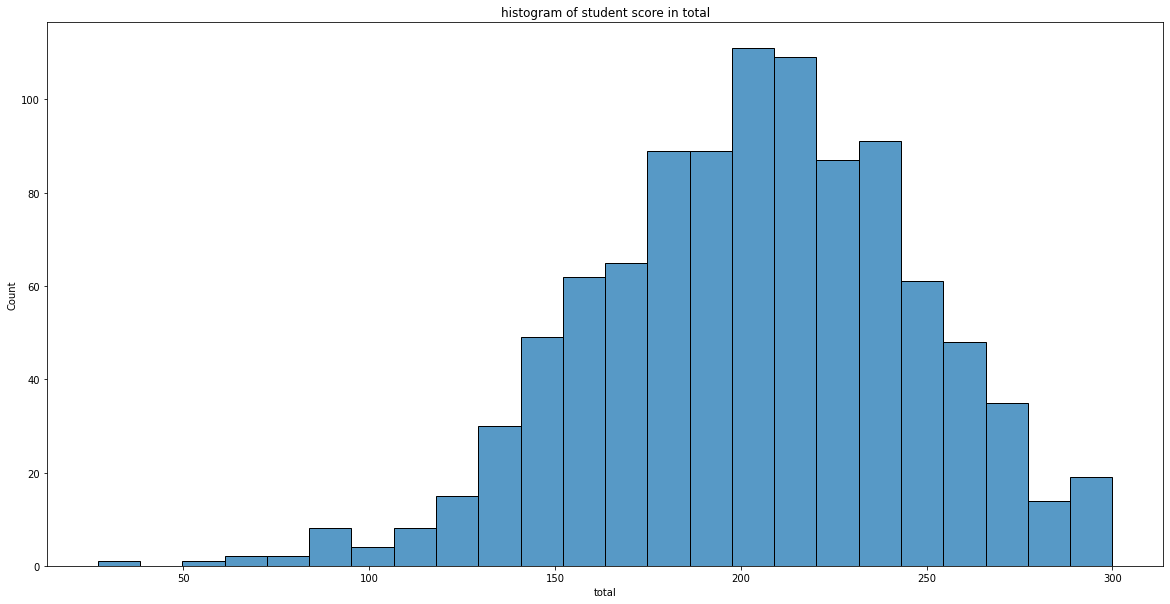

By looking at the above histogram we can se the graph is normal, there is very slight left skew becuase one student got 27 marks in total.


In [86]:
plt.figure(figsize=(20,10))
sns.histplot(stu.total)
plt.title('histogram of student score in total')
plt.show()

print('By looking at the above histogram we can se the graph is normal, there is very slight left skew becuase one student got 27 marks in total.')

Lets find out who got the highest marks in total and who got the lowest.<a class="anchor" id="low"></a>

In [62]:
display(stu.sort_values('total',ascending=False).head(5))

print('As we can see 3 students from 1 male and 2 females from group E scored the maximum number of marks 300/300')

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,division
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,First Division
458,female,group E,bachelor's degree,standard,not completed,100,100,100,300,First Division
962,female,group E,associate's degree,standard,not completed,100,100,100,300,First Division
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,First Division
179,female,group D,some high school,standard,completed,97,100,100,297,First Division


As we can see 3 students from 1 male and 2 females from group E scored the maximum number of marks 300/300


In [108]:
display(stu.sort_values('total',ascending=True).head(3))

print('One female from group C scored the least of total marks which is 27 out of 300')

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,division
59,female,group C,some high school,free/reduced,not completed,0,17,10,27,Fail
980,female,group B,high school,free/reduced,not completed,8,24,23,55,Fail
596,male,group B,high school,free/reduced,not completed,30,24,15,69,Fail


One female from group C scored the least of total marks which is 27 out of 300


lets check the average score of all three subjects.
<br>
maths , reading & writing scores.<a class="anchor" id="sub"></a>

In [64]:
print(stu[['math score', 'reading score', 'writing score']].describe())

print('As we can see the reading and writing score mean ad median are quite similar, having mean of 69 for reading and 68 for writing. For median reading got 70 and writing 69. For the math score both mean and median are bit low in comparison to other 2 subjects, having 66 for both mean and median')

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
As we can see the reading and writing score mean ad median are quite similar, having mean of 69 for reading and 68 for writing. For median reading got 70 and writing 69. For the math score both mean and median are bit low in comparison to other 2 subjects, having 66 for both mean and median


In [65]:
tidy = pd.melt(frame = stu, value_vars=['math score','reading score', 'writing score'], var_name= 'subjects', value_name= 'scores')
tidy

,subjects,scores
0,math score,72
1,math score,69
2,math score,90
3,math score,47
4,math score,76
...,...,...
2995,writing score,95
2996,writing score,55
2997,writing score,65
2998,writing score,77


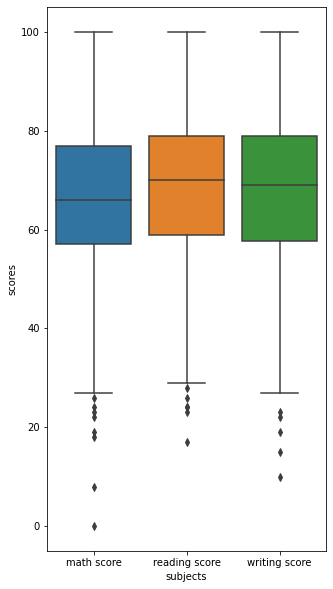

By looking at the above box plot we can see 50% of data are overlapping to each other therefore we can assume there three subjects are no associated with each other.


In [66]:
plt.figure(figsize= (5,10))
sns.boxplot(x = tidy.subjects, y = tidy.scores)
plt.show()

- ratio of male female<a class="anchor" id="ratio"></a>

In [67]:
gen = stu.gender.value_counts()
gen


female    518
male      482
Name: gender, dtype: int64

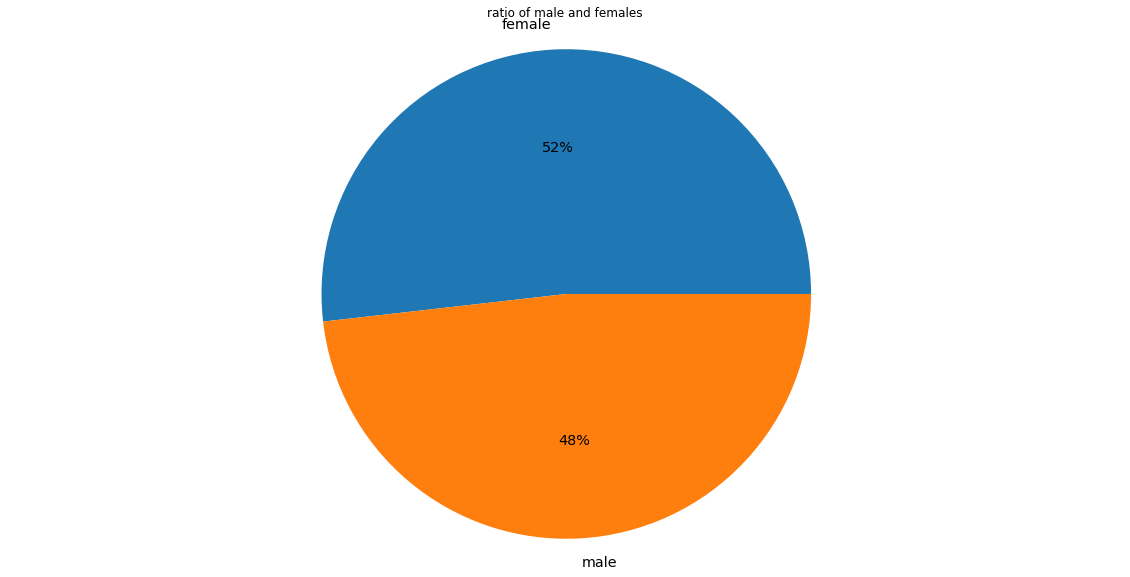

In [68]:
plt.figure(figsize=(20,10))
plt.pie(x = gen, labels = gen.index,autopct='%.0f%%', textprops={'size': 'x-large'})
plt.axis('equal')
plt.title('ratio of male and females')

plt.show()

- Ratio of ethnicity<a class="anchor" id="eth"></a>

In [69]:
grp = stu.ethnicity.value_counts()
print(grp)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64


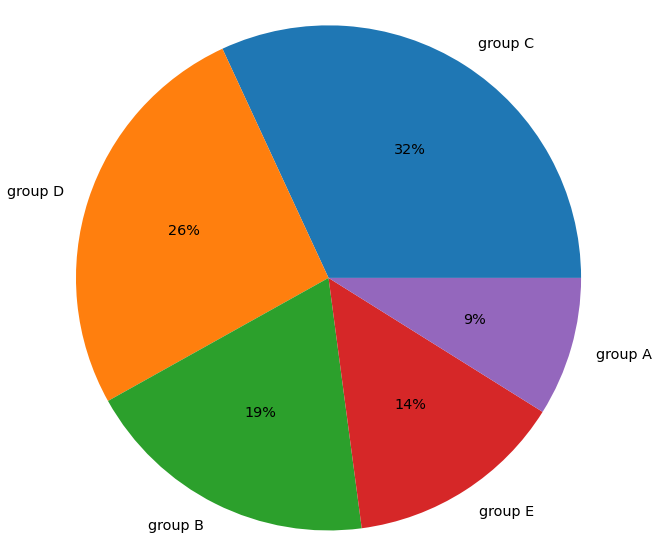

In [70]:
plt.figure(figsize=(10,10))
plt.pie(x = grp,labels = grp.index,autopct='%.0f%%', textprops={'size': 'x-large'})
plt.axis('equal')
plt.show()

- Lets see which group perform best in terms of total scores.<a class="anchor" id="grp2"></a>

In [71]:
dataset = stu.groupby(['gender', 'ethnicity']).total.mean().reset_index()
pivot = dataset.pivot(columns = 'gender',
                      index = 'ethnicity',
                      values = 'total')
print(pivot)

gender         female        male
ethnicity                        
group A    195.388889  184.622642
group B    202.528846  189.000000
group C    205.755556  195.748201
group D    214.317829  200.962406
group E    222.188406  214.436620


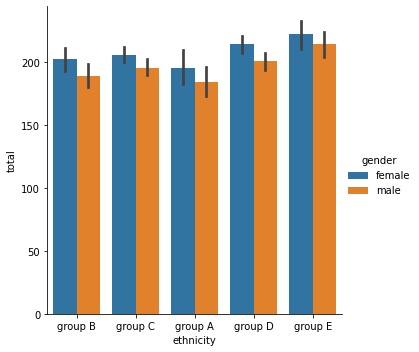

In [106]:

sns.catplot(x = 'ethnicity', y='total', 
               hue = 'gender',data=stu, kind='bar')
plt.show()

Which gender perfomed better overall?<a class="anchor" id="grp"></a>

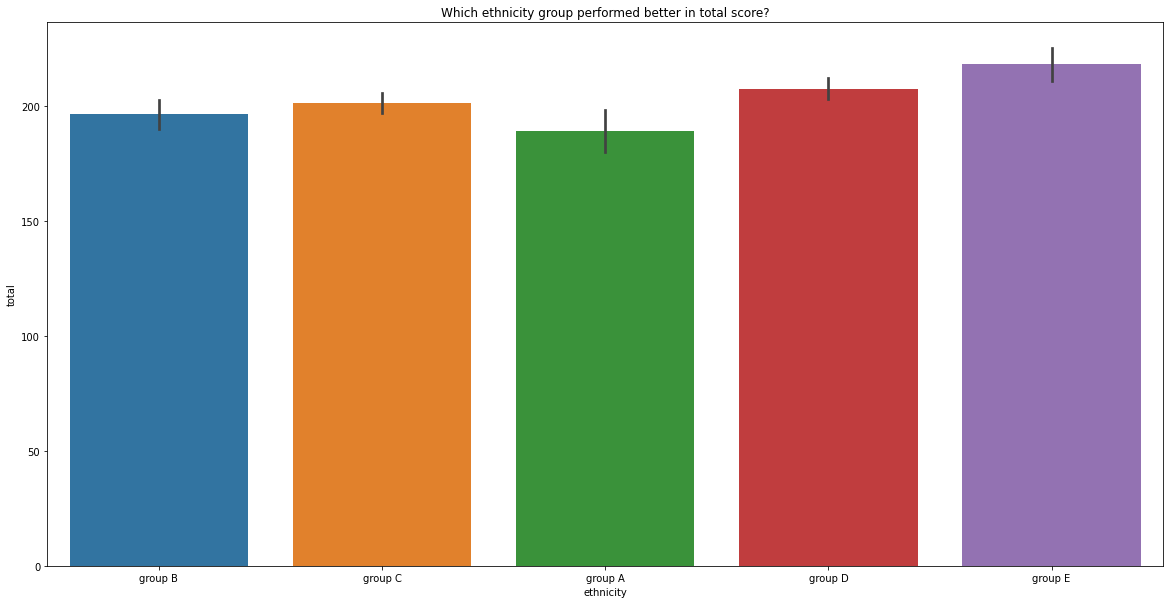

From the above bar plot we can see that students from ethnicity 'group E' performed better in comparison to ther ethnicity groups.


In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x = stu['ethnicity'],y = stu.total)
plt.title('Which ethnicity group performed better in total score?')
plt.show()

print('From the above bar plot we can see that students from ethnicity \'group E\' performed better in comparison to ther ethnicity groups.')

Which gender perfomed better overall?<a class="anchor" id="over"></a>

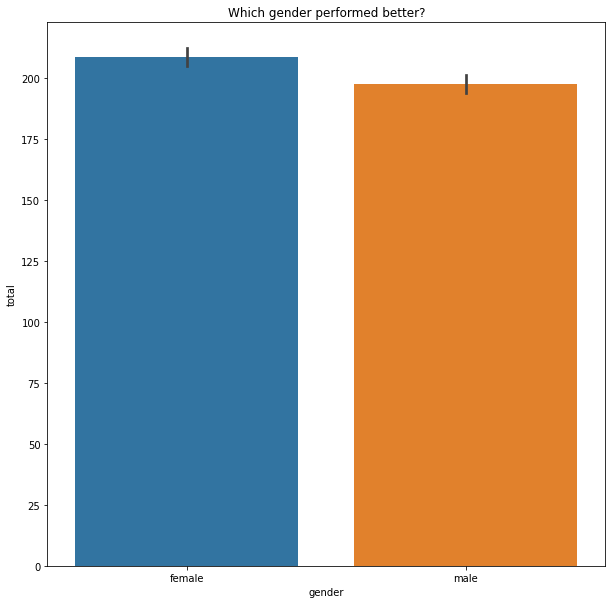

From the above bar plot we can conclude that the on average 'female' perfomed better in overall score in comparison to males


In [93]:
plt.figure(figsize=(10,10))
sns.barplot(x = stu['gender'],y = stu.total)
plt.title('Which gender performed better?')
plt.show()

print('From the above bar plot we can conclude that the on average \'female\' perfomed better in overall score in comparison to males')

How many students have failed and which group have the most?<a class="anchor" id="fail"></a>

In [74]:
not_failed = stu[stu['division'] != 'Fail']
display(not_failed)
print('991 student have passed out of 1000 students.')

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,First Division
1,female,group C,some college,standard,completed,69,90,88,247,First Division
2,female,group B,master's degree,standard,not completed,90,95,93,278,First Division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,Third Division
4,male,group C,some college,standard,not completed,76,78,75,229,First Division
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,First Division
996,male,group C,high school,free/reduced,not completed,62,55,55,172,Second Division
997,female,group C,high school,free/reduced,completed,59,71,65,195,First Division
998,female,group D,some college,standard,completed,68,78,77,223,First Division


991 student have passed out of 1000 students.


In [75]:
failed = stu[stu.division == 'Fail']
print(failed.ethnicity.value_counts())

print('Group B got the most Failed student with the total number of 5.')

group B    5
group C    2
group E    1
group A    1
Name: ethnicity, dtype: int64
Group B got the most Failed student with the total number of 5.


those student whose parent are more educated are expected to get more good grades?<a class="anchor" id="par"></a>

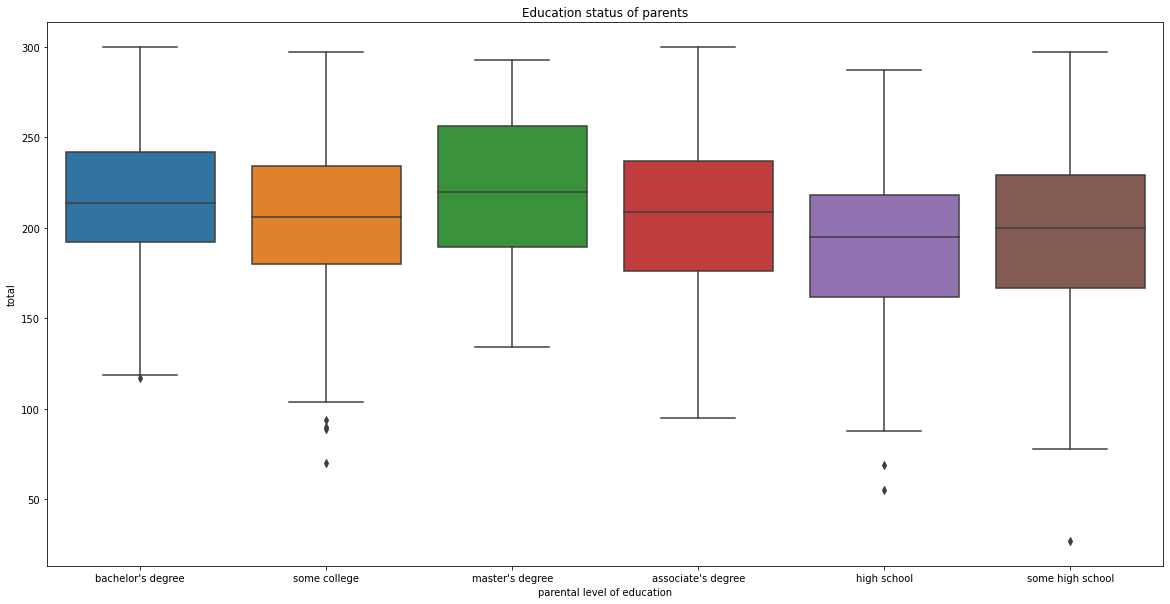

From the above box plot we can see that those student's parent have master's degree got more grades in comparison to others. Therefore we can assume that if the parent is mroe educated then the student also tends to get better score.


In [107]:
plt.figure(figsize=(20,10))
sns.boxplot(x= stu['parental level of education'],y = stu.total)
plt.title('Education status of parents')
plt.show()

print('From the above box plot we can see that those student\'s parent have master\'s degree got more grades in comparison to others. Therefore we can assume that if the parent is mroe educated then the student also tends to get better score.')

Those students whose completed there course got more grades in compare to those student who didn't?

- Lets see how many students have complated the course and how many have not.<a class="anchor" id="course"></a>

In [77]:
course = (stu['test preparation course'].value_counts())
course

not completed    642
completed        358
Name: test preparation course, dtype: int64

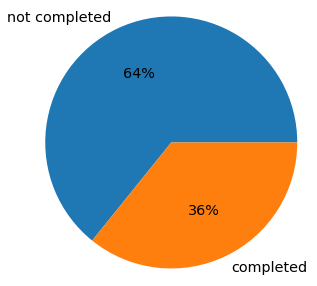

There is 642 students who have not complted the course and 358 who have completed which makes 64 to 36 ratio between them.


In [78]:
plt.figure(figsize=(5,5))
plt.pie(x = course,labels = course.index,autopct='%.0f%%', textprops={'size': 'x-large'})
plt.axis('equal')
plt.show()

print('There is 642 students who have not complted the course and 358 who have completed which makes 64 to 36 ratio between them.')

- Calculating the mean and median difference.

In [79]:
completed = stu['total'][stu['test preparation course'] == 'completed']
not_complated = stu['total'][stu['test preparation course'] == 'not completed']

mean_comp = completed.mean()
mean_not_com = not_complated.mean()

diff_mean = mean_comp - mean_not_com
print(diff_mean)

22.891557458361632


In [80]:
median_comp = completed.median()
median_not_comp = not_complated.median()

diff_median = median_comp - median_not_comp
print(diff_median)

print('The mean and median difference is 22 and 24.')

24.5
The mean and median difference is 22 and 24.


- Lets compare with side by side box plot

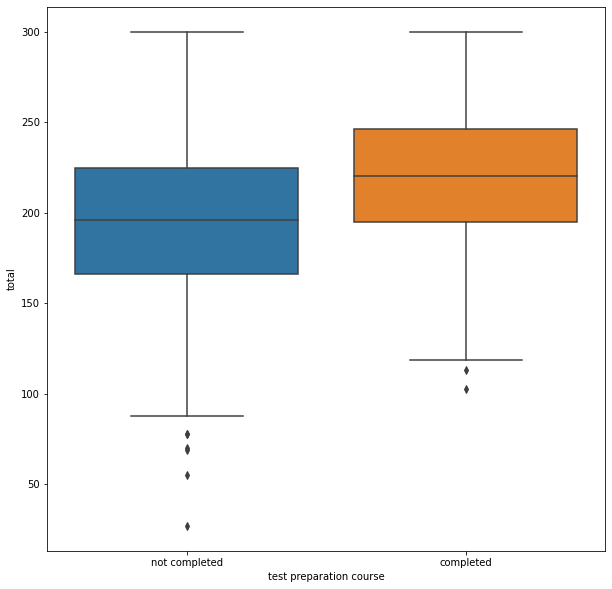

From the above box plot comparison we can see theat those students who've completed the the couse got more total marks.


In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(data = stu, x = 'test preparation course', y= 'total')
plt.show()

print('From the above box plot comparison we can see theat those students who\'ve completed the the couse got more total marks.')

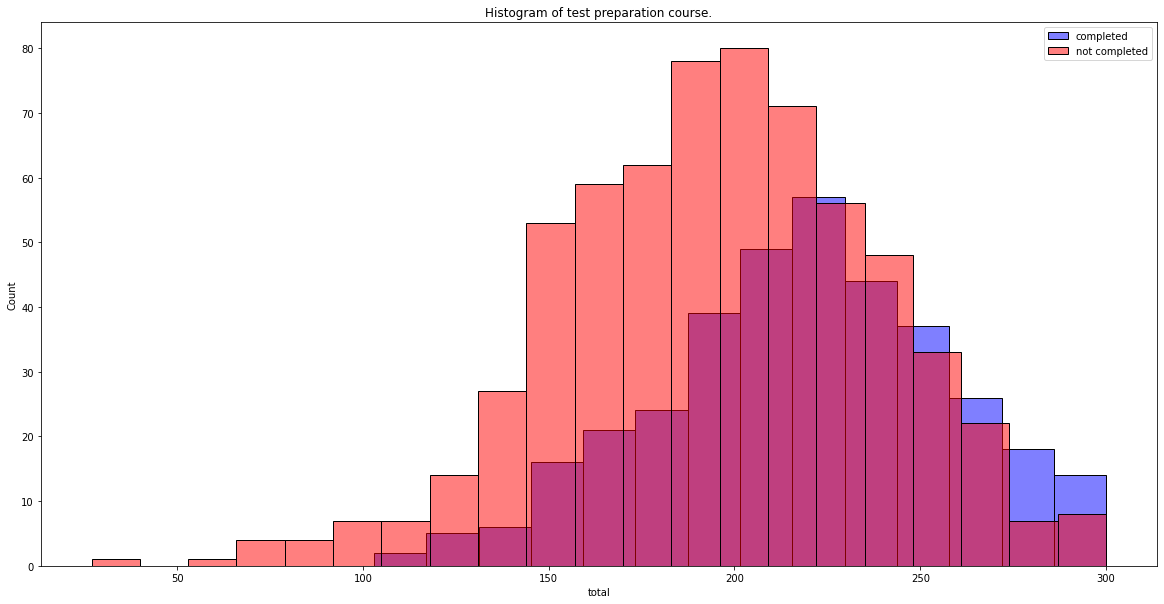

By looking at the above histogram though the number of students who have not complated the couse is more but those students completed the course got more marks.


In [82]:
plt.figure(figsize=(20,10))
sns.histplot(completed,color= 'blue', alpha=0.5,label = 'completed')
sns.histplot(not_complated,color= 'red', alpha=0.5, label = 'not completed')
plt.legend()
plt.title('Histogram of test preparation course.')
plt.show()

print('By looking at the above histogram though the number of students who have not complated the couse is more but those students completed the course got more marks.')

Is there any correlation between the subjects?<a class="anchor" id="corr"></a>

In [83]:
corr, p = pearsonr(stu['math score'], stu['reading score'])
print('Math and reading score correlation is ' + str(corr))

corr, p = pearsonr(stu['math score'], stu['writing score'])
print('Math and writing score correlation is ' + str(corr))

corr, p = pearsonr(stu['reading score'], stu['writing score'])
print('Reading and writing score correlation is ' + str(corr))

Math and reading score correlation is 0.8175796636720541
Math and writing score correlation is 0.8026420459498083
Reading and writing score correlation is 0.9545980771462479


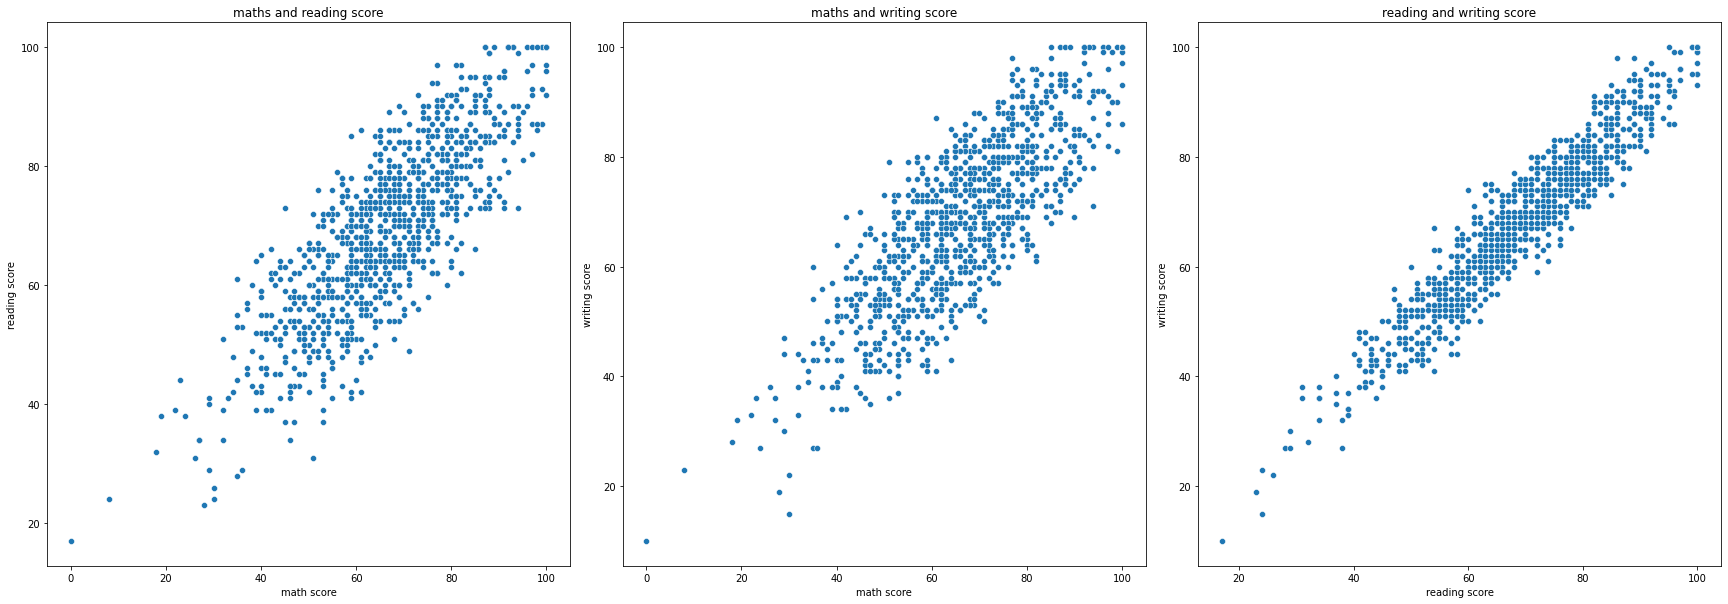

In [84]:
plt.figure(figsize= (30,10))

ax = plt.subplot(1,3,1)
sns.scatterplot(x=stu['math score'], y = stu['reading score'])
plt.title('maths and reading score')

ax = plt.subplot(1,3,2)
sns.scatterplot(x=stu['math score'], y = stu['writing score'])
plt.title('maths and writing score')

ax = plt.subplot(1,3,3)
sns.scatterplot(x=stu['reading score'], y = stu['writing score'])
plt.title('reading and writing score')

plt.subplots_adjust(wspace=0.1)

plt.show()
